In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [262]:
data = pd.read_csv('Advertising.csv', index_col=0)
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [263]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [264]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [266]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [267]:
import seaborn as sns

<AxesSubplot:>

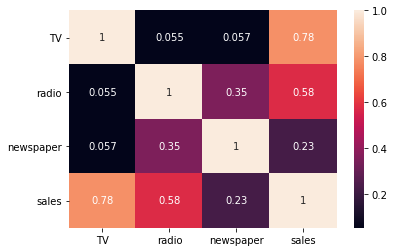

In [268]:
sns.heatmap(data.corr(), annot=True)
# below from TV we are getting higest sales0.78

In [269]:
from sklearn.preprocessing import StandardScaler

In [270]:
sc=StandardScaler()
x=data.iloc[0:,0:-1] # all Inputs
y=data.sales  # Output, target var,labled var, indepndant var
x=sc.fit_transform(x) # we will Learn and apply all imputs 
x=pd.DataFrame(x) # Aftrer sc data will be in array so need to convert in dataframe
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [271]:
x.describe()

,0,1,2
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.104672e-16,-4.413137e-16,2.220446e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.708823e+00,-1.570868e+00,-1.392646e+00
25%,-8.485295e-01,-8.973206e-01,-8.195504e-01
50%,3.161515e-02,-2.457858e-02,-2.211368e-01
75%,8.381955e-01,8.954299e-01,6.695788e-01
max,1.744029e+00,1.778300e+00,3.841171e+00


In [272]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=40)

In [273]:
xtrain.head()

,0,1,2
86,-0.826052,0.286030,-0.669947
182,-1.060757,-1.185984,-0.039311
69,0.814550,1.393416,-0.154391
125,-0.698774,-0.774090,-0.214232
42,1.711334,0.299535,-1.323599


In [274]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [275]:
# print intercept and coefficients
print("C",lm.intercept_) #y=0.04
print("m1, m2, m3", lm.coef_) #slope

C 14.16169444211124
m1, m2, m3 [ 3.76920495  2.88972169 -0.07578433]


In [277]:
pred= lm.predict(xtest)
pred = pd.DataFrame(pred, columns=['Predicted_Value'])
pred.head()

,Predicted_Value
0,12.616427
1,12.920046
2,12.084714
3,16.822000
4,24.055075


In [278]:
print(data['sales'])

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64


In [279]:
ytest

97     11.7
6       7.2
117    12.2
36     12.8
184    26.2
161    14.4
55     20.2
135    10.8
91     11.2
192     9.9
140    20.7
143    20.1
178    11.7
27     15.0
90     16.7
141    10.9
172    14.5
24     15.5
133     5.7
38     14.7
152    11.6
29     18.9
86     15.2
94     22.2
175    11.5
76      8.7
19     11.3
106    19.2
122     7.0
131     1.6
34     17.4
47     10.6
169    17.1
170    15.0
12     17.4
167     8.0
82     12.3
112    21.8
68     13.4
148    25.4
Name: sales, dtype: float64

In [280]:
pd.concat([ytest, pred], axis=1)

,sales,Predicted_Value
0,NaN,12.616427
1,NaN,12.920046
2,NaN,12.084714
3,NaN,16.822000
4,NaN,24.055075
...,...,...
172,14.5,NaN
175,11.5,NaN
178,11.7,NaN
184,26.2,NaN


In [282]:
ytest.reset_index(drop=True, inplace=True)
pd.concat([ytest, pred], axis=1)

,sales,Predicted_Value
0,11.7,12.616427
1,7.2,12.920046
2,12.2,12.084714
3,12.8,16.822000
4,26.2,24.055075
5,14.4,14.274013
6,20.2,20.383404
7,10.8,12.184211
8,11.2,10.091746
9,9.9,8.666554


In [286]:
pred_train = lm.predict(xtrain)
print('Trainning R2_score:', r2_score(ytrain, pred_train)) # well with traingn and bad with testing
print('Testing R2_score:', r2_score(ytest, pred)) # this condition is overgiting

Trainning R2_score: 0.920068668721091
Testing R2_score: 0.7982652261831079


In [290]:
mean_squared_error(ytest, pred)


5.5449210792435215